In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#библиотека для обработки естественного языка:
#!pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [11]:
#В NLTK уже есть встроенный предварительно обученный анализатор настроений под названием VADER ( Valence Aware Dictionary и Sentiment Reasoner).
#Однако VADER лучше всего подходит для языка, используемого в социальных сетях, например, для коротких предложений со сленгом и сокращениями.
#Он менее точен при оценке длинных, структурированных предложений, но часто является хорошей отправной точкой.
#Чтобы использовать VADER, сначала создайте экземпляр nltk.sentiment.SentimentIntensityAnalyzer, 
#а затем используйте его .polarity_scores()для необработанной строки:
#VADER lexicon: Это предварительно подготовленный лексикон (словарь слов и их оценок настроений), который используется для анализа настроений. Он предоставляется библиотекой nltk.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ort-y\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
sia = SentimentIntensityAnalyzer()

In [311]:
df = pd.read_csv('clear_data.csv')

In [299]:
df.dtypes

product_id              object
product_name            object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count             int64
category_main           object
category_sub            object
type_product            object
date                    object
review_title            object
review_content          object
user_id                 object
dtype: object

In [313]:
df['sentiment'] = df['review_title'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment2'] = df['review_content'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [347]:
df[['sentiment','sentiment2']].describe()

,sentiment,sentiment2
count,1465.000000,1465.000000
mean,0.516652,0.819558
std,0.392131,0.368313
min,-0.879800,-0.982100
25%,0.340000,0.868800
50%,0.647800,0.961300
75%,0.817600,0.988600
max,0.982800,0.999900


Оценка настроений представлена в виде компаунд ('compound')-показателя, который может принимать значения от -1 (отрицательное настроение) до 1 (положительное настроение). Значения близкие к 0 считаются нейтральными.

<Axes: >

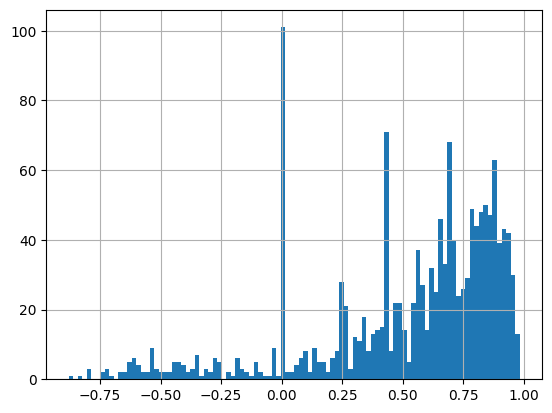

In [371]:
df['sentiment'].hist(bins = 100)

In [331]:
def sentiment_label (score):
    if score>=0.05:
        return 'Positive'
    elif score <=0.05:
        return 'Negative'
    else:
        return 'Neutral

In [356]:
sentiment_labels = df['sentiment'].apply(sentiment_label)

In [357]:
df['sentiment_label'] = sentiment_labels

In [358]:
df[['product_id','review_title','review_content', 'rating','sentiment', 'sentiment2', 'sentiment_label']].tail(3)

,product_id,review_title,review_content,rating,sentiment,sentiment2,sentiment_label
1462,B009P2LIL4,"very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",3.6,0.0000,0.9698,Neutral
1463,B00J5DYCCA,"Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,4.0,0.3182,-0.2960,Positive
1464,B01486F4G6,"Works perfect,Ok good product,Nice Product. Re...",It does it job perfectly..only issue is temp c...,4.3,0.7615,0.9915,Positive


<Figure size 800x600 with 0 Axes>

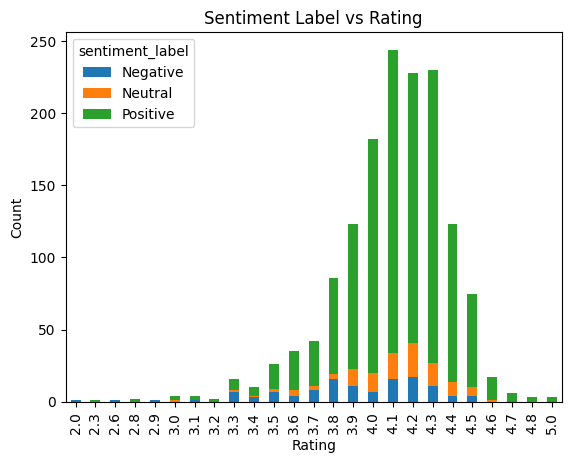

In [368]:
#существует ли какая-либо корреляция между настроениями и рейтинговыми баллами:
fig = plt.figure (figsize = (8,6))
df.groupby(['rating','sentiment_label']).size().unstack().plot(kind = 'bar', stacked = True)
plt.title('Sentiment Label vs Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('Sentiment Label vs Rating.png')
plt.show()

In [361]:
sentiment_counts = df['sentiment_label'].value_counts()
sentiment_counts

sentiment_label
Positive    1231
Negative     119
Neutral      115
Name: count, dtype: int64

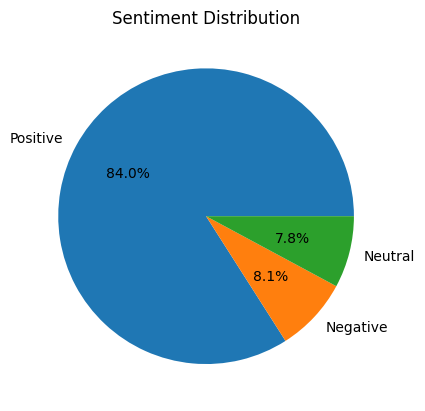

In [369]:
plt.pie(sentiment_counts, labels = sentiment_counts.index, autopct = '%1.1f%%')
plt.title ('Sentiment Distribution')
plt.savefig('Sentiment Distribution.png')
plt.show()

In [372]:
df.to_csv ('sentimental_analysis.csv',index= False)

In [373]:
df[(df['rating']<3)][['product_name','rating', 'actual_price','discount_percentage','category_main', 'type_product','sentiment_label' ]]

,product_name,rating,actual_price,discount_percentage,category_main,type_product,sentiment_label
545,SHREENOVA ID116 Plus Bluetooth Fitness Smart W...,2.8,1999.0,86.0,Electronics,SmartWatches,Positive
1243,"Personal Size Blender, Portable Blender, Batte...",2.3,1499.0,55.0,Home&Kitchen,HandBlenders,Positive
1286,MR. BRAND Portable USB Juicer Electric USB Jui...,2.8,2199.0,77.0,Home&Kitchen,JuicerMixerGrinders,Positive
1309,Khaitan ORFin Fan heater for Home and kitchen-...,2.0,2495.0,48.0,Home&Kitchen,FanHeaters,Negative
1356,Green Tales Heat Seal Mini Food Sealer-Impulse...,2.6,300.0,46.0,Home&Kitchen,VacuumSealers,Negative
1449,IONIX Tap filter Multilayer | Activated Carbon...,2.9,699.0,72.0,Home&Kitchen,WaterPurifierAccessories,Negative


In [377]:
df[(df['discount_percentage']>90)]

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_main,category_sub,type_product,date,review_title,review_content,user_id,sentiment,sentiment2,Sentiment_label,sentiment_label,sentiment_label2
334,B0BF57RN3K,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",1799.0,19999.0,91.0,4.2,13937,Electronics,WearableTechnology,SmartWatches,2023-02-04,"Worth the money,Good smart watch,the screen do...","I liked it, worth the money, light weight and ...","AEC6UDCEAUIBIFHGQDQ4KR67GC4A,AHRKSUOZXKKDERRY3...",0.8442,0.9952,Positive,Positive,Positive
364,B0BF54972T,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",1799.0,19999.0,91.0,4.2,13937,Electronics,WearableTechnology,SmartWatches,2023-02-07,"Worth the money,Good smart watch,the screen do...","I liked it, worth the money, light weight and ...","AEC6UDCEAUIBIFHGQDQ4KR67GC4A,AHRKSUOZXKKDERRY3...",0.8442,0.9952,Positive,Positive,Positive
368,B0BF563HB4,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",1799.0,19999.0,91.0,4.2,13937,Electronics,WearableTechnology,SmartWatches,2023-02-07,"Worth the money,Good smart watch,the screen do...","I liked it, worth the money, light weight and ...","AEC6UDCEAUIBIFHGQDQ4KR67GC4A,AHRKSUOZXKKDERRY3...",0.8442,0.9952,Positive,Positive,Positive
372,B0BF4YBLPX,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",1799.0,19999.0,91.0,4.2,13937,Electronics,WearableTechnology,SmartWatches,2023-02-08,"Worth the money,Good smart watch,the screen do...","I liked it, worth the money, light weight and ...","AEC6UDCEAUIBIFHGQDQ4KR67GC4A,AHRKSUOZXKKDERRY3...",0.8442,0.9952,Positive,Positive,Positive
380,B0BF54LXW6,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",1799.0,19999.0,91.0,4.2,13937,Electronics,WearableTechnology,SmartWatches,2023-02-09,"Worth the money,Good smart watch,the screen do...","I liked it, worth the money, light weight and ...","AEC6UDCEAUIBIFHGQDQ4KR67GC4A,AHRKSUOZXKKDERRY3...",0.8442,0.9952,Positive,Positive,Positive
695,B097C564GC,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",294.0,4999.0,94.0,4.3,4426,Computers&Accessories,Accessories&Peripherals,USBtoUSBAdapters,2023-03-13,"Tiny helping hand,Good product,As a whole good...",This eliminates the need to buy chargers for t...,"AGO5SRT3ESLNL5WTRQFD5BSIYPQA,AGGNODUMRADB3PQQT...",0.7845,0.1416,Positive,Positive,Positive
